In [122]:
# import numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# estimators
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.cross_validation import train_test_split

In [123]:
#import the data

credit = pd.read_csv('Preprocessedcreditdata.csv', header = 0)
credit.head()  


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AGE_bin,status_Apr,status_May,status_Jun,status_Jul,...,bill_Jul,bill_Aug,bill_Sep,prev_pay_Apr,prev_pay_May,prev_pay_Jun,prev_pay_Jul,prev_pay_Aug,prev_pay_Sep,default_pay
0,20000,2,2,1,24,1,0,0,0,0,...,689,3102,3913,0,0,0,0,689,0,1
1,120000,2,2,2,26,1,2,0,0,0,...,2682,1725,2682,2000,0,1000,1000,1000,0,1
2,90000,2,2,2,34,2,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,0
3,50000,2,2,1,37,2,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,0
4,50000,1,2,1,57,4,0,0,0,0,...,35835,5670,8617,679,689,9000,10000,36681,2000,0


In [124]:
credit.sample(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AGE_bin,status_Apr,status_May,status_Jun,status_Jul,...,bill_Jul,bill_Aug,bill_Sep,prev_pay_Apr,prev_pay_May,prev_pay_Jun,prev_pay_Jul,prev_pay_Aug,prev_pay_Sep,default_pay
29377,50000,1,2,2,30,1,0,0,2,0,...,4533,2496,1382,0,0,313,0,2254,1300,0
25327,80000,2,2,1,27,1,0,2,2,2,...,3740,1603,3970,0,2096,0,0,2191,0,1
26856,500000,1,2,1,41,3,0,0,0,0,...,184782,171565,155820,20037,20151,20019,20154,20241,20000,0
8611,150000,2,2,2,23,1,0,0,0,0,...,151996,10053,27414,5002,5300,5019,4700,156292,10096,0
14876,150000,2,1,2,37,2,0,0,0,2,...,1402,1582,180,0,0,0,3244,0,1402,0
29297,50000,1,2,1,28,1,0,0,0,0,...,0,50125,49139,0,0,0,0,0,2500,0
14804,150000,2,4,1,35,2,0,0,0,0,...,36143,37441,39708,1141,1140,1183,1170,1510,1608,0
14422,80000,1,1,2,39,2,0,2,2,0,...,68204,63774,62281,2500,4000,0,3000,5500,2500,1
11404,60000,1,2,2,30,1,0,0,0,0,...,390,390,41540,390,1000,16056,0,390,390,0
16302,200000,2,2,3,40,2,0,0,0,0,...,61827,110699,118728,4706,5826,0,35955,3927,4895,1


In [125]:
credit.shape

(29946, 25)

In [126]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AGE_bin,status_Apr,status_May,status_Jun,status_Jul,...,bill_Jul,bill_Aug,bill_Sep,prev_pay_Apr,prev_pay_May,prev_pay_Jun,prev_pay_Jul,prev_pay_Aug,prev_pay_Sep,default_pay
count,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,...,2.994600e+04,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,2.994600e+04,29946.000000,29946.000000
mean,167546.573165,1.603486,1.840646,1.554665,35.481300,1.996026,0.226474,0.221465,0.258632,0.303814,...,4.706321e+04,49224.542744,51278.911841,5220.871035,4804.211080,4829.614573,5227.841314,5.926824e+03,5659.736826,0.221432
std,129807.831678,0.489182,0.743774,0.518259,9.218413,0.965536,0.715407,0.717765,0.761134,0.790364,...,6.939321e+04,71219.298988,73682.871378,17791.413753,15290.655486,15677.788192,17618.433069,2.306022e+04,16552.642231,0.415218
min,10000.000000,1.000000,1.000000,1.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-1.572640e+05,-69777.000000,-165580.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.684500e+03,2988.250000,3570.250000,122.000000,255.250000,298.000000,390.000000,8.360000e+02,1000.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,2.010800e+04,21221.000000,22400.000000,1500.000000,1500.000000,1500.000000,1800.000000,2.010000e+03,2100.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,6.024075e+04,64108.000000,67263.000000,4000.000000,4040.750000,4015.000000,4511.500000,5.000000e+03,5007.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,6.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,983931.000000,964511.000000,528666.000000,426529.000000,621000.000000,896040.000000,1.684259e+06,873552.000000,1.000000


In [127]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 25 columns):
LIMIT_BAL       29946 non-null int64
SEX             29946 non-null int64
EDUCATION       29946 non-null int64
MARRIAGE        29946 non-null int64
AGE             29946 non-null int64
AGE_bin         29946 non-null int64
status_Apr      29946 non-null int64
status_May      29946 non-null int64
status_Jun      29946 non-null int64
status_Jul      29946 non-null int64
status_Aug      29946 non-null int64
status_Sep      29946 non-null int64
bill_Apr        29946 non-null int64
bill_May        29946 non-null int64
bill_Jun        29946 non-null int64
bill_Jul        29946 non-null int64
bill_Aug        29946 non-null int64
bill_Sep        29946 non-null int64
prev_pay_Apr    29946 non-null int64
prev_pay_May    29946 non-null int64
prev_pay_Jun    29946 non-null int64
prev_pay_Jul    29946 non-null int64
prev_pay_Aug    29946 non-null int64
prev_pay_Sep    29946 non-null int64
def

In [128]:
# convert into categorical data

credit.SEX = credit.SEX.astype('category')
credit.EDUCATION = credit.EDUCATION.astype('category')
credit.MARRIAGE = credit.MARRIAGE.astype('category')
credit.AGE_bin = credit.AGE_bin.astype('category')

#credit.status_Apr = credit.status_Apr.astype('category')
#credit.status_May = credit.status_May.astype('category')
#credit.status_Jun = credit.status_Jun.astype('category')
#credit.status_Jul = credit.status_Jul.astype('category')
#credit.status_Aug = credit.status_Aug.astype('category')
#credit.status_Sep = credit.status_Sep.astype('category')

credit.default_pay = credit.default_pay.astype('category')


In [129]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 25 columns):
LIMIT_BAL       29946 non-null int64
SEX             29946 non-null category
EDUCATION       29946 non-null category
MARRIAGE        29946 non-null category
AGE             29946 non-null int64
AGE_bin         29946 non-null category
status_Apr      29946 non-null int64
status_May      29946 non-null int64
status_Jun      29946 non-null int64
status_Jul      29946 non-null int64
status_Aug      29946 non-null int64
status_Sep      29946 non-null int64
bill_Apr        29946 non-null int64
bill_May        29946 non-null int64
bill_Jun        29946 non-null int64
bill_Jul        29946 non-null int64
bill_Aug        29946 non-null int64
bill_Sep        29946 non-null int64
prev_pay_Apr    29946 non-null int64
prev_pay_May    29946 non-null int64
prev_pay_Jun    29946 non-null int64
prev_pay_Jul    29946 non-null int64
prev_pay_Aug    29946 non-null int64
prev_pay_Sep    29946 non-nu

In [130]:
# SEX 

credit.SEX.describe()

count     29946
unique        2
top           2
freq      18072
Name: SEX, dtype: int64

In [131]:
# Dummy SEX variable 

pd.get_dummies(credit.SEX).head()

,1,2
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [132]:
credit['Sex_male'] = pd.get_dummies(credit.SEX).iloc[:, :-1]

In [133]:
credit.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AGE_bin,status_Apr,status_May,status_Jun,status_Jul,...,bill_Aug,bill_Sep,prev_pay_Apr,prev_pay_May,prev_pay_Jun,prev_pay_Jul,prev_pay_Aug,prev_pay_Sep,default_pay,Sex_male
0,20000,2,2,1,24,1,0,0,0,0,...,3102,3913,0,0,0,0,689,0,1,0
1,120000,2,2,2,26,1,2,0,0,0,...,1725,2682,2000,0,1000,1000,1000,0,1,0
2,90000,2,2,2,34,2,0,0,0,0,...,14027,29239,5000,1000,1000,1000,1500,1518,0,0
3,50000,2,2,1,37,2,0,0,0,0,...,48233,46990,1000,1069,1100,1200,2019,2000,0,0
4,50000,1,2,1,57,4,0,0,0,0,...,5670,8617,679,689,9000,10000,36681,2000,0,1
5,50000,1,1,2,37,2,0,0,0,0,...,57069,64400,800,1000,1000,657,1815,2500,0,1
6,500000,1,1,2,29,1,0,0,0,0,...,412023,367965,13770,13750,20239,38000,40000,55000,0,1
7,100000,2,2,2,23,1,0,0,0,0,...,380,11876,1542,1687,581,0,601,380,0,0
8,140000,2,3,1,28,1,0,0,0,2,...,14096,11285,1000,1000,1000,432,0,3329,0,0
9,20000,1,3,2,35,2,0,0,0,0,...,0,0,0,1122,13007,0,0,0,0,1


In [134]:
# EDUCATION

credit.EDUCATION.value_counts()

2    14024
1    10581
3     4873
4      468
Name: EDUCATION, dtype: int64

In [135]:
# Dummy EDUCATION variable

pd.get_dummies(credit.EDUCATION).head()


,1,2,3,4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [136]:
edu_dummies = pd.get_dummies(credit.EDUCATION, prefix = "Edu") #.iloc[:, :-1]

In [137]:
credit = pd.concat([credit, edu_dummies], axis = 1)

In [138]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AGE_bin,status_Apr,status_May,status_Jun,status_Jul,...,prev_pay_Jun,prev_pay_Jul,prev_pay_Aug,prev_pay_Sep,default_pay,Sex_male,Edu_1,Edu_2,Edu_3,Edu_4
0,20000,2,2,1,24,1,0,0,0,0,...,0,0,689,0,1,0,0,1,0,0
1,120000,2,2,2,26,1,2,0,0,0,...,1000,1000,1000,0,1,0,0,1,0,0
2,90000,2,2,2,34,2,0,0,0,0,...,1000,1000,1500,1518,0,0,0,1,0,0
3,50000,2,2,1,37,2,0,0,0,0,...,1100,1200,2019,2000,0,0,0,1,0,0
4,50000,1,2,1,57,4,0,0,0,0,...,9000,10000,36681,2000,0,1,0,1,0,0


In [139]:
# MARRIAGE

credit.MARRIAGE.value_counts()


2    15964
1    13659
3      323
Name: MARRIAGE, dtype: int64

In [140]:
# MARRIAGE dummy 

pd.get_dummies(credit.MARRIAGE).head()

,1,2,3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [141]:
marriage_dummies = pd.get_dummies(credit.MARRIAGE, prefix = 'Marriage')

In [142]:
credit = pd.concat([credit, marriage_dummies], axis = 1)

In [143]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AGE_bin,status_Apr,status_May,status_Jun,status_Jul,...,prev_pay_Sep,default_pay,Sex_male,Edu_1,Edu_2,Edu_3,Edu_4,Marriage_1,Marriage_2,Marriage_3
0,20000,2,2,1,24,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,120000,2,2,2,26,1,2,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,90000,2,2,2,34,2,0,0,0,0,...,1518,0,0,0,1,0,0,0,1,0
3,50000,2,2,1,37,2,0,0,0,0,...,2000,0,0,0,1,0,0,1,0,0
4,50000,1,2,1,57,4,0,0,0,0,...,2000,0,1,0,1,0,0,1,0,0


In [144]:
# AGE_bin

credit.AGE_bin.value_counts()

1    11001
2    10691
3     5990
4     1925
5      314
6       25
Name: AGE_bin, dtype: int64

In [145]:
# Age_bin dummy

age_dummies = pd.get_dummies(credit.AGE_bin, prefix = 'Age')

In [146]:
credit = pd.concat([credit, age_dummies], axis = 1)

In [147]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AGE_bin,status_Apr,status_May,status_Jun,status_Jul,...,Edu_4,Marriage_1,Marriage_2,Marriage_3,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6
0,20000,2,2,1,24,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,120000,2,2,2,26,1,2,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,90000,2,2,2,34,2,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,50000,2,2,1,37,2,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,50000,1,2,1,57,4,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [148]:
del credit['SEX']
del credit['EDUCATION']
del credit['MARRIAGE']
del credit['AGE']
del credit['AGE_bin']

In [149]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 34 columns):
LIMIT_BAL       29946 non-null int64
status_Apr      29946 non-null int64
status_May      29946 non-null int64
status_Jun      29946 non-null int64
status_Jul      29946 non-null int64
status_Aug      29946 non-null int64
status_Sep      29946 non-null int64
bill_Apr        29946 non-null int64
bill_May        29946 non-null int64
bill_Jun        29946 non-null int64
bill_Jul        29946 non-null int64
bill_Aug        29946 non-null int64
bill_Sep        29946 non-null int64
prev_pay_Apr    29946 non-null int64
prev_pay_May    29946 non-null int64
prev_pay_Jun    29946 non-null int64
prev_pay_Jul    29946 non-null int64
prev_pay_Aug    29946 non-null int64
prev_pay_Sep    29946 non-null int64
default_pay     29946 non-null category
Sex_male        29946 non-null uint8
Edu_1           29946 non-null uint8
Edu_2           29946 non-null uint8
Edu_3           29946 non-null uint8


In [152]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'status_Apr', 'status_May', 'status_Jun', 'status_Jul',
       'status_Aug', 'status_Sep', 'bill_Apr', 'bill_May', 'bill_Jun',
       'bill_Jul', 'bill_Aug', 'bill_Sep', 'prev_pay_Apr', 'prev_pay_May',
       'prev_pay_Jun', 'prev_pay_Jul', 'prev_pay_Aug', 'prev_pay_Sep',
       'default_pay', 'Sex_male', 'Edu_1', 'Edu_2', 'Edu_3', 'Edu_4',
       'Marriage_1', 'Marriage_2', 'Marriage_3', 'Age_1', 'Age_2', 'Age_3',
       'Age_4', 'Age_5', 'Age_6'],
      dtype='object')


In [155]:
credit = credit[['LIMIT_BAL', 'status_Apr', 'status_May', 'status_Jun', 'status_Jul','status_Aug', 'status_Sep', 'bill_Apr', 
'bill_May', 'bill_Jun', 'bill_Jul', 'bill_Aug', 'bill_Sep', 'prev_pay_Apr', 'prev_pay_May', 'prev_pay_Jun', 
'prev_pay_Jul', 'prev_pay_Aug', 'prev_pay_Sep', 'Sex_male', 'Edu_1', 'Edu_2', 'Edu_3', 'Edu_4', 'Marriage_1', 
'Marriage_2', 'Marriage_3', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6', 'default_pay']]


In [156]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 34 columns):
LIMIT_BAL       29946 non-null int64
status_Apr      29946 non-null int64
status_May      29946 non-null int64
status_Jun      29946 non-null int64
status_Jul      29946 non-null int64
status_Aug      29946 non-null int64
status_Sep      29946 non-null int64
bill_Apr        29946 non-null int64
bill_May        29946 non-null int64
bill_Jun        29946 non-null int64
bill_Jul        29946 non-null int64
bill_Aug        29946 non-null int64
bill_Sep        29946 non-null int64
prev_pay_Apr    29946 non-null int64
prev_pay_May    29946 non-null int64
prev_pay_Jun    29946 non-null int64
prev_pay_Jul    29946 non-null int64
prev_pay_Aug    29946 non-null int64
prev_pay_Sep    29946 non-null int64
Sex_male        29946 non-null uint8
Edu_1           29946 non-null uint8
Edu_2           29946 non-null uint8
Edu_3           29946 non-null uint8
Edu_4           29946 non-null uint8
Mar

In [157]:
corrMat = credit.corr()
print(corrMat)

              LIMIT_BAL  status_Apr  status_May  status_Jun  status_Jul  \
LIMIT_BAL      1.000000   -0.167632   -0.169923   -0.180456   -0.190959   
status_Apr    -0.167632    1.000000    0.740024    0.602917    0.492772   
status_May    -0.169923    0.740024    1.000000    0.745611    0.551407   
status_Jun    -0.180456    0.602917    0.745611    1.000000    0.678744   
status_Jul    -0.190959    0.492772    0.551407    0.678744    1.000000   
status_Aug    -0.196945    0.406354    0.462015    0.512585    0.663464   
status_Sep    -0.170598    0.373155    0.423847    0.460047    0.516733   
bill_Apr       0.290417    0.046030    0.042577    0.033222    0.029101   
bill_May       0.295586    0.041821    0.036191    0.027333    0.026345   
bill_Jun       0.294006    0.020638    0.024122    0.014746    0.016734   
bill_Jul       0.283246    0.001723    0.003352    0.002750    0.002589   
bill_Aug       0.278344   -0.009725   -0.008607   -0.012454   -0.000775   
bill_Sep       0.285521  

In [158]:
# select the features: without default_pay 

features = credit.iloc[:, :-1]
print('Selection of feature sample')
features.head()


Selection of feature sample


,LIMIT_BAL,status_Apr,status_May,status_Jun,status_Jul,status_Aug,status_Sep,bill_Apr,bill_May,bill_Jun,...,Edu_4,Marriage_1,Marriage_2,Marriage_3,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6
0,20000,0,0,0,0,2,2,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,120000,2,0,0,0,2,0,3261,3455,3272,...,0,0,1,0,1,0,0,0,0,0
2,90000,0,0,0,0,0,0,15549,14948,14331,...,0,0,1,0,0,1,0,0,0,0
3,50000,0,0,0,0,0,0,29547,28959,28314,...,0,1,0,0,0,1,0,0,0,0
4,50000,0,0,0,0,0,0,19131,19146,20940,...,0,1,0,0,0,0,0,1,0,0


In [159]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 33 columns):
LIMIT_BAL       29946 non-null int64
status_Apr      29946 non-null int64
status_May      29946 non-null int64
status_Jun      29946 non-null int64
status_Jul      29946 non-null int64
status_Aug      29946 non-null int64
status_Sep      29946 non-null int64
bill_Apr        29946 non-null int64
bill_May        29946 non-null int64
bill_Jun        29946 non-null int64
bill_Jul        29946 non-null int64
bill_Aug        29946 non-null int64
bill_Sep        29946 non-null int64
prev_pay_Apr    29946 non-null int64
prev_pay_May    29946 non-null int64
prev_pay_Jun    29946 non-null int64
prev_pay_Jul    29946 non-null int64
prev_pay_Aug    29946 non-null int64
prev_pay_Sep    29946 non-null int64
Sex_male        29946 non-null uint8
Edu_1           29946 non-null uint8
Edu_2           29946 non-null uint8
Edu_3           29946 non-null uint8
Edu_4           29946 non-null uint8
Mar

In [160]:
# select the dependent variable: default_pay (repayment status)

depVar = credit['default_pay']
depVar.head()

0    1
1    1
2    0
3    0
4    0
Name: default_pay, dtype: category
Categories (2, int64): [0, 1]

In [161]:
credit.default_pay.value_counts()

0    23315
1     6631
Name: default_pay, dtype: int64

In [162]:
#run split

X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size = 0.30)

In [163]:
X_train.shape, X_test.shape

((20962, 33), (8984, 33))

In [164]:
y_train.shape, y_test.shape

((20962,), (8984,))

In [27]:
# TRAINING SET
# establish the training set for the X-variables or Feature space

# X_train = features[:-1000]
# X_train.shape

(28946, 22)

In [29]:
# TRAINING SET
# establish the training set for the Y-variable; the number of rows must match the X-training set.

#y_train = depVar[:-1000]
#y_train_count = len(y_train.index)
#print('The number of observations in the Y training set are:', str(y_train_count))
#y_train.shape

The number of observations in the Y training set are: 28946


(28946,)

In [31]:
# TESTING SET
# establish the testing set for the X - variables 

#X_test = features[-100:]
#X_test_count = len(X_test.index)
#print('The number of observations in the feature testing set is:',str(X_test_count))
#X_test

The number of observations in the feature testing set is: 100


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE_bin,status_Apr,status_May,status_Jun,status_Jul,status_Aug,...,bill_May,bill_Jun,bill_Jul,bill_Aug,bill_Sep,prev_pay_Apr,prev_pay_May,prev_pay_Jun,prev_pay_Jul,prev_pay_Aug
29846,20000,1,2,2,1,0,0,0,0,0,...,0,0,0,0,16809,0,0,0,0,0
29847,50000,1,2,2,1,0,0,0,0,2,...,50248,50590,103486,48750,50845,781,1208,1563,3250,6556
29848,170000,1,3,2,1,0,0,0,0,0,...,126198,161351,168955,168088,10392,5003,4519,4448,7335,6409
29849,260000,1,1,1,1,0,0,0,0,0,...,99,99,13333,17082,27378,30013,172104,99,99,13333
29850,60000,1,3,2,1,0,0,0,0,0,...,59306,58732,54126,56021,54952,1462,1000,2000,5800,4553
29851,50000,1,3,1,1,0,0,0,2,2,...,19000,18630,17614,18195,17479,6000,727,680,1310,0
29852,150000,1,3,2,1,0,0,0,0,0,...,27228,20546,26068,108706,106556,6222,3279,17322,184133,81620
29853,240000,1,1,2,1,0,2,2,2,0,...,57554,60645,62848,72951,64826,1900,2000,0,4400,34
29854,140000,1,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29855,360000,1,1,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#TESTING SET
# establish ground truth (y_test)

#y_test = depVar[:-100]
#y_test_count = len(y_test.index)
#print('The number of observations in the Y training set are:',str(y_test_count))
#y_test

The number of observations in the Y training set are: 29846


0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29816    1
29817    0
29818    0
29819    0
29820    1
29821    0
29822    0
29823    0
29824    1
29825    0
29826    1
29827    0
29828    0
29829    0
29830    0
29831    1
29832    0
29833    0
29834    0
29835    0
29836    0
29837    0
29838    0
29839    0
29840    1
29841    0
29842    1
29843    1
29844    0
29845    1
Name: default_pay, Length: 29846, dtype: int64

In [165]:
# Models

modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [166]:
# Model Fitting
# Random Forest

RF = modelRF.fit(X_train, y_train)

In [168]:
RF

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [170]:
#SVR

SVR = modelSVR.fit(X_train, y_train)

In [175]:
#Linear Regression
LR = modelLR.fit(X_train, y_train)

In [177]:
# Model Fitting
# RF: modelRF

print(cross_val_score(RF, X_train, y_train))
RF.score(X_train, y_train)

[0.09503523 0.11906237 0.0999199 ]


0.8392919885728641

In [178]:
# SVR

print(cross_val_score(SVR, X_train, y_train)) 
SVR.score(X_train, y_train)

[-0.0178602  -0.01367721 -0.02419264]


0.908915457478987

In [179]:
# LM

print(cross_val_score(LR, X_train, y_train))
LR.score(X_train, y_train)

[0.17206598 0.19148187 0.17537133]


0.18247944655485926

In [52]:
# Predictions

predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)


R Squared: 0.997
RMSE: 1248.445


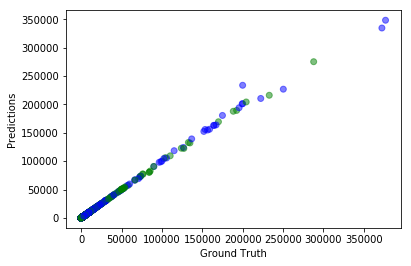

In [55]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();